# **HEALTH CARE: CHECK HEART ATTACK POSSIBILITY**

Importing our dependencies 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
from operator import add

In [3]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Uploading our dataset. (the .csv file)

In [4]:
files.upload()

Saving heart.csv to heart (5).csv


{'heart.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,

In [5]:
heart1 = pd.read_csv("heart.csv")

Handling the Missing Attributes

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") #fill the median at empty spaces 
imputer.fit(heart1)
X = imputer.transform(heart1)
heart=pd.DataFrame(X, columns=heart1.columns)

In [7]:
heart.head(303) #view the head

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


# **Data Analysis**

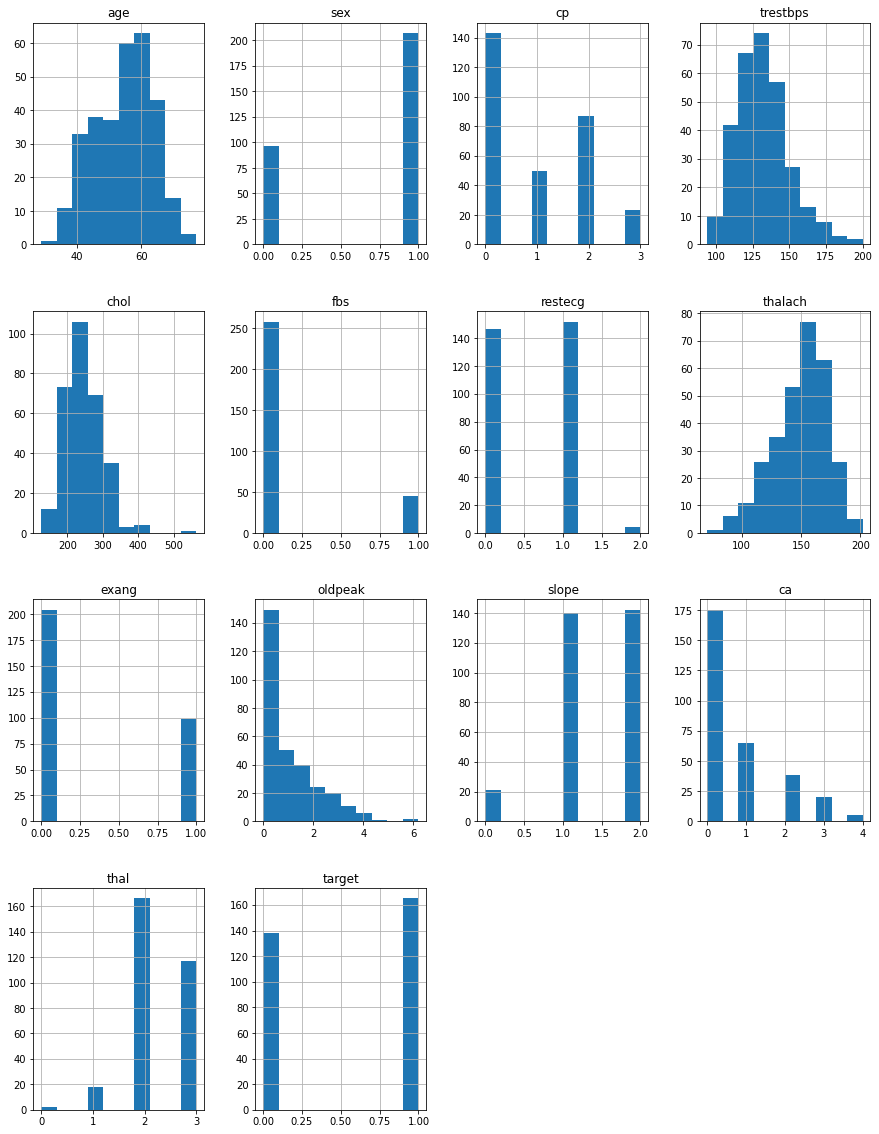

In [8]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
heart1.hist(ax = ax)
plt.show()

## **Feature Selection**

In [9]:
X = heart.iloc[:,:-1]
y = heart.iloc[:,-1]

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [10]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [11]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [12]:
featureScores

,Specs,Score
0,age,23.286624
1,sex,7.576835
2,cp,62.598098
3,trestbps,14.823925
4,chol,23.936394
5,fbs,0.202934
6,restecg,2.978271
7,thalach,188.320472
8,exang,38.914377
9,oldpeak,72.644253


In [13]:
print(featureScores.nlargest(6,'Score'))

      Specs       Score
7   thalach  188.320472
9   oldpeak   72.644253
11       ca   66.440765
2        cp   62.598098
8     exang   38.914377
4      chol   23.936394


# **Feature Scaling**

In [14]:
dataset = pd.get_dummies(heart, columns = ['cp',  'ca']) #categorical data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['chol',  'thalach', 'oldpeak', 'exang']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset = dataset.drop(['age','sex','fbs','restecg','thal','slope','trestbps'],axis=1)

In [15]:
dataset.head()

,chol,thalach,exang,oldpeak,target,cp_0.0,cp_1.0,cp_2.0,cp_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_4.0
0,-0.256334,0.015443,-0.696631,1.087338,1.0,0,0,0,1,1,0,0,0,0
1,0.072199,1.633471,-0.696631,2.122573,1.0,0,0,1,0,1,0,0,0,0
2,-0.816773,0.977514,-0.696631,0.310912,1.0,0,1,0,0,1,0,0,0,0
3,-0.198357,1.239897,-0.696631,-0.206705,1.0,0,1,0,0,1,0,0,0,0
4,2.082050,0.583939,1.435481,-0.379244,1.0,1,0,0,0,1,0,0,0,0


# **Splitting the Dataset**

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(dataset, test_size=0.3, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 212
Rows in test set: 91



In [17]:
X_train = train_set.iloc[:,0:13]  #independent columns for training 
y_train = train_set.iloc[:,-1]    #o/p for train set
X_test = test_set.iloc[:,0:13]    #independent columns for testing 
y_test = test_set.iloc[:,-1]       #o/p for test set

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

# **K-Nearest Neighbours (K-NN) Model**

1


Text(0, 0.5, 'Error Rate')

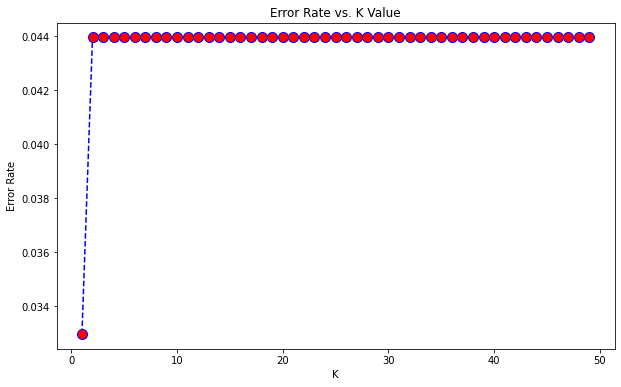

In [19]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,50): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
  

min = (np.argmin(error_rate) +1)
print(min)
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [20]:
knn = KNeighborsClassifier(n_neighbors=(min))
#train the model
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH MIN K = ', min)
print('\n')
#prediction 
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
knn_accuracy = accuracy_score(y_test,pred)

WITH MIN K =  1


[[86  1]
 [ 2  2]]


              precision    recall  f1-score   support

           0       0.98      0.99      0.98        87
           1       0.67      0.50      0.57         4

    accuracy                           0.97        91
   macro avg       0.82      0.74      0.78        91
weighted avg       0.96      0.97      0.96        91



## **Support Vector Machine (SVM) Model**

In [21]:
from sklearn import svm
from sklearn.svm import SVC
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [22]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9560439560439561


In [23]:
Cs = [0.001, 0.01, 0.1, 1, 10] #Hyperparameter1
gammas = [0.001, 0.01, 0.1, 10] #Hyperparameter2
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_

{'C': 0.001, 'gamma': 0.001}

In [24]:
#prediction
svm_predict = svm_clf.predict(X_test)
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM with RBF kernel we get an accuracy of {round(svm_accuracy*100,2)}%")


Using SVM with RBF kernel we get an accuracy of 95.6%


In [25]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print("confusion matrix:\n", cm)
print(classification_report(y_test,svm_predict))


confusion matrix:
 [[87  0]
 [ 4  0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        87
           1       0.00      0.00      0.00         4

    accuracy                           0.96        91
   macro avg       0.48      0.50      0.49        91
weighted avg       0.91      0.96      0.93        91



# **Random Forest Classification (RFC) Model**

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=25 ,criterion='entropy', random_state=42)
#train the model
classifier.fit(X_train,y_train)
#prediction
y_pred=classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
rfc_accuracy = accuracy_score(y_test, y_pred)
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print("confusion matrix:\n", cm)

Accuracy :  0.967032967032967
confusion matrix:
 [[87  0]
 [ 3  1]]


# **Logistic Regression Method**

In [27]:
######Logistic Regression Method

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [28]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_accuracy = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_accuracy*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[87  0]
 [ 4  0]]


Accuracy of Logistic Regression: 95.6043956043956 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        87
           1       0.00      0.00      0.00         4

    accuracy                           0.96        91
   macro avg       0.48      0.50      0.49        91
weighted avg       0.91      0.96      0.93        91



# **Cross Validation**

In [29]:
##K folds
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [30]:
##CV score for logistic regression
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
cv_score_lr = scores.mean()
print('cv_score: %.3f (%.3f)' % (mean(scores), std(scores)))


cv_score: 0.867 (0.031)


In [31]:
##CV score for Random Forest
model = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
cv_score_rfc = scores.mean()
print('cv_score: %.3f (%.3f)' % (mean(scores), std(scores)))


cv_score: 0.919 (0.028)


In [32]:
##CV score for SVM
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=cv)
cv_score_svm = scores.mean()
print('cv_score: %.3f (%.3f)' % (mean(scores), std(scores)))

cv_score: 0.870 (0.034)


In [33]:
##CV score for KNN
knn_classifier = KNeighborsClassifier(n_neighbors = 18)
score=cross_val_score(knn_classifier,X,y,cv=cv)
cv_score_knn = score.mean()
print('cv_score: %.3f (%.3f)' % (mean(scores), std(scores)))

cv_score: 0.870 (0.034)


[0.87, 0.9193333333333332, 0.8673333333333334, 0.9233333333333335]


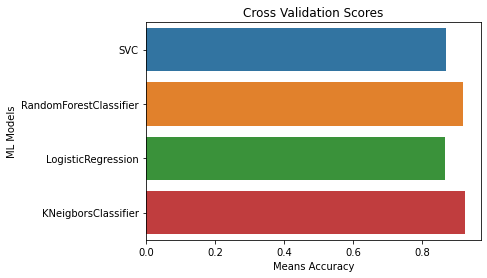

In [34]:
##plotting cv scores of respective models
cv_result = []
cv_result.append(cv_score_svm)
cv_result.append(cv_score_rfc)
cv_result.append(cv_score_lr)
cv_result.append(cv_score_knn)
cv_results = pd.DataFrame(cv_result)
print(cv_result)
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":[ "SVC", "RandomForestClassifier", "LogisticRegression", "KNeigborsClassifier"]})

g = sns.barplot(x="Cross Validation Means", y = "ML Models", data=cv_results)
g.set_xlabel("Means Accuracy")
g.set_title("Cross Validation Scores")
plt.show()

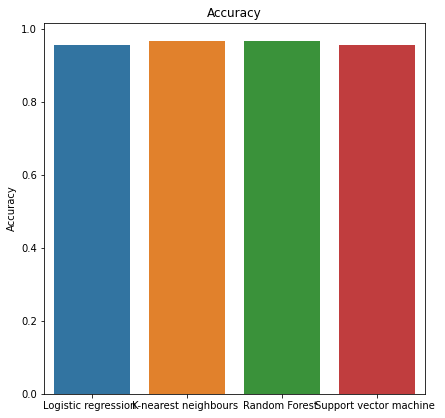

In [35]:
comparison = pd.DataFrame({
    "Logistic regression ":{'Accuracy': lr_accuracy},
    "K-nearest neighbours ":{'Accuracy':knn_accuracy},
    "Random Forest ":{'Accuracy':rfc_accuracy},
    "Support vector machine ":{'Accuracy':svm_accuracy}
}).T
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['Accuracy']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()